In [29]:
import pandas as pd

In [30]:
df = pd.read_csv('ETH_1h.csv', index_col='Date',parse_dates=['Date'], date_format='%Y-%m-%d %I-%p')
df.head()

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [31]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [32]:
df.sort_index(inplace=True)
df

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2017-07-01 11:00:00,ETHUSD,279.98,279.99,272.10,275.01,679358.87
2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
...,...,...,...,...,...,...
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81


In [33]:
prediction_df = df.resample('D').agg({'High':'max','Low':'min','Volume':'sum','Close':'last'})
prediction_df

,High,Low,Volume,Close
Date,,,,
2017-07-01,279.99,253.23,2.858402e+07,263.12
2017-07-02,293.73,255.70,5.226229e+07,285.00
2017-07-03,285.00,273.07,3.501635e+07,276.37
2017-07-04,282.83,265.00,3.010991e+07,269.20
2017-07-05,274.97,252.67,4.315016e+07,266.27
...,...,...,...,...
2020-03-09,208.65,189.85,9.131404e+07,202.77
2020-03-10,206.28,195.17,3.727352e+07,200.50
2020-03-11,202.98,181.00,4.547683e+07,194.61


In [34]:
# shift is done after resample() else it will break the values of tomorrow
prediction_df['Tomorrow'] = prediction_df['Close'].shift(-1) 
prediction_df

,High,Low,Volume,Close,Tomorrow
Date,,,,,
2017-07-01,279.99,253.23,2.858402e+07,263.12,285.00
2017-07-02,293.73,255.70,5.226229e+07,285.00,276.37
2017-07-03,285.00,273.07,3.501635e+07,276.37,269.20
2017-07-04,282.83,265.00,3.010991e+07,269.20,266.27
2017-07-05,274.97,252.67,4.315016e+07,266.27,266.01
...,...,...,...,...,...
2020-03-09,208.65,189.85,9.131404e+07,202.77,200.50
2020-03-10,206.28,195.17,3.727352e+07,200.50,194.61
2020-03-11,202.98,181.00,4.547683e+07,194.61,110.30


In [35]:
prediction_df.dropna(inplace=True)

In [36]:
def targ(x):
    if(x['Close']<x['Tomorrow']):
        return 1
    elif(x['Close']==x['Tomorrow']):
        return 0
    else:
        return -1
prediction_df['Target'] = prediction_df.apply(targ, axis='columns')
prediction_df

,High,Low,Volume,Close,Tomorrow,Target
Date,,,,,,
2017-07-01,279.99,253.23,2.858402e+07,263.12,285.00,1
2017-07-02,293.73,255.70,5.226229e+07,285.00,276.37,-1
2017-07-03,285.00,273.07,3.501635e+07,276.37,269.20,-1
2017-07-04,282.83,265.00,3.010991e+07,269.20,266.27,-1
2017-07-05,274.97,252.67,4.315016e+07,266.27,266.01,-1
...,...,...,...,...,...,...
2020-03-08,237.75,196.00,6.291071e+07,199.46,202.77,1
2020-03-09,208.65,189.85,9.131404e+07,202.77,200.50,-1
2020-03-10,206.28,195.17,3.727352e+07,200.50,194.61,-1


In [37]:
prediction_df['MA_10'] = prediction_df['Close'].rolling(10).mean()
prediction_df['Volatility'] = prediction_df['High'] - prediction_df['Low']
prediction_df.head(20)

,High,Low,Volume,Close,Tomorrow,Target,MA_10,Volatility
Date,,,,,,,,
2017-07-01,279.99,253.23,2.858402e+07,263.12,285.00,1,NaN,26.76
2017-07-02,293.73,255.70,5.226229e+07,285.00,276.37,-1,NaN,38.03
2017-07-03,285.00,273.07,3.501635e+07,276.37,269.20,-1,NaN,11.93
2017-07-04,282.83,265.00,3.010991e+07,269.20,266.27,-1,NaN,17.83
2017-07-05,274.97,252.67,4.315016e+07,266.27,266.01,-1,NaN,22.30
2017-07-06,275.00,261.59,2.310482e+07,266.01,241.28,-1,NaN,13.41
2017-07-07,266.97,235.01,4.323564e+07,241.28,246.64,1,NaN,31.96
2017-07-08,249.50,231.25,3.255106e+07,246.64,238.81,-1,NaN,18.25
2017-07-09,253.31,236.00,1.750668e+07,238.81,202.86,-1,NaN,17.31


In [38]:
prediction_df.dropna(inplace=True)
prediction_df

,High,Low,Volume,Close,Tomorrow,Target,MA_10,Volatility
Date,,,,,,,,
2017-07-10,240.33,185.39,8.359540e+07,202.86,190.57,-1,255.556,54.94
2017-07-11,216.50,175.56,1.037703e+08,190.57,224.04,1,248.301,40.94
2017-07-12,228.88,181.00,8.623487e+07,224.04,205.00,-1,242.205,47.88
2017-07-13,227.00,193.07,4.705455e+07,205.00,197.23,-1,235.068,33.93
2017-07-14,206.99,183.12,4.134945e+07,197.23,167.72,-1,227.871,23.87
...,...,...,...,...,...,...,...,...
2020-03-08,237.75,196.00,6.291071e+07,199.46,202.77,1,225.378,41.75
2020-03-09,208.65,189.85,9.131404e+07,202.77,200.50,-1,222.918,18.80
2020-03-10,206.28,195.17,3.727352e+07,200.50,194.61,-1,221.237,11.11


In [39]:
prediction_df['Close'].agg(['min','max'])

min      83.00
max    1386.02
Name: Close, dtype: float64

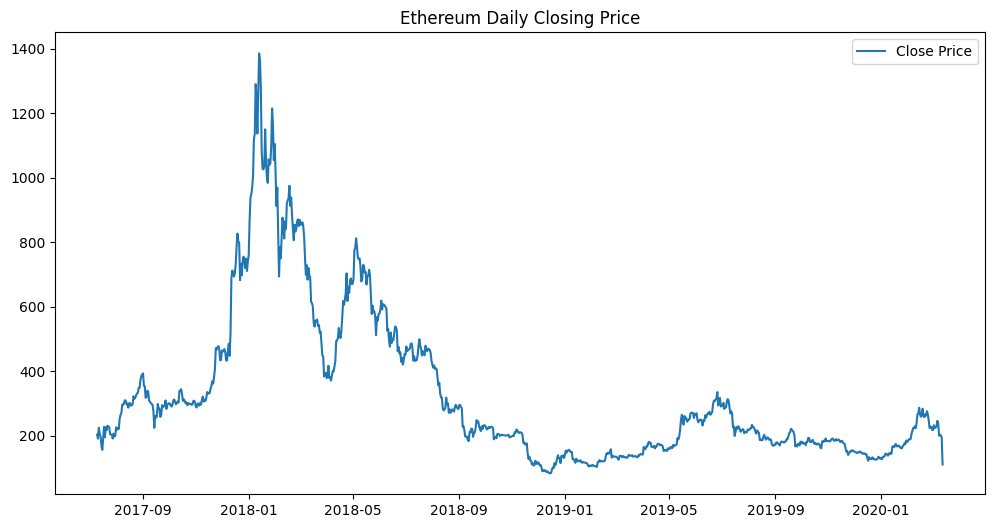

In [40]:
# Price Trend
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(prediction_df['Close'], label='Close Price')
plt.title('Ethereum Daily Closing Price')
plt.legend()
plt.show()


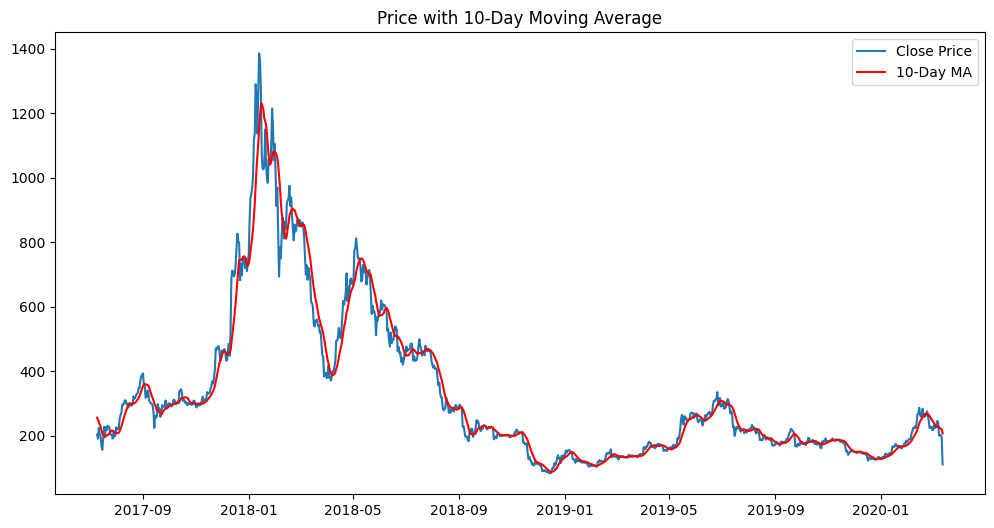

In [41]:
plt.figure(figsize=(12,6))
plt.plot(prediction_df['Close'], label='Close Price')
plt.plot(prediction_df['MA_10'], label='10-Day MA', color='red')
plt.legend()
plt.title('Price with 10-Day Moving Average')
plt.show()


In [42]:
prediction_df['Target'].value_counts()

Target
 1    489
-1    488
Name: count, dtype: int64